<a href="https://colab.research.google.com/github/Sparsh-Dwivedi/Customer-Churn-Analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Telecom Customer Churn Analysis***

Data exploration, cleaning, visualization, and
insights derived from the analysis.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df= pd.read_csv('/content/telecom_customer - Sheet1.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Modelling and Cleaning**

In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df["TotalCharges"] =df['TotalCharges'].replace("", '0')
df["TotalCharges"] =df['TotalCharges'].astype('float')

In [7]:
df.describe()   #for only int values

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.describe(include='object')

#  specifies that only columns with the data type object (typically strings or categorical data in pandas)
# The summary provides the following statistics for these columns:

# count: Number of non-missing values.
# unique: Number of unique values.
# top: Most frequent value (mode).
# freq: Frequency of the most frequent value.

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Modelling

In [10]:
 #converted 0 and 1 into yes and no
def conv(value):
  if value == 1:
    return 'yes'
  else:
    return 'no'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Total Customer Churn Count**

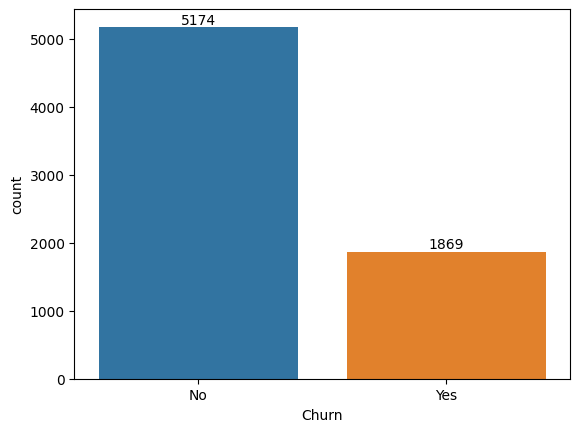

In [34]:
ax=sns.countplot(x='Churn',data=df, hue='Churn')

for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

**This is total Customer Churn Count and majority of them don't churn out**

In [13]:
gb= df.groupby(['Churn']).agg({'Churn': "count"})
gb



,Churn
Churn,
No,5174
Yes,1869


In [14]:
gb= df.groupby(['Churn','gender']).agg({'Churn': 'count'})
gb

Churn
Churn gender       
No    Female   2549
      Male     2625
Yes   Female    939
      Male      930

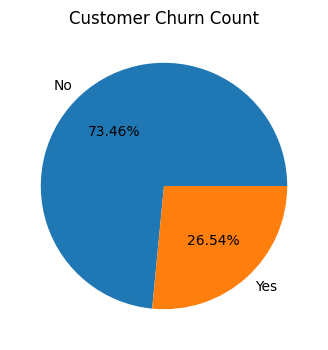

In [15]:
# @title Customer churn count percentage via pie chart
plt.figure(figsize=(4,4))
gb = df.groupby('Churn').agg({'Churn': 'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title('Customer Churn Count')
plt.show()

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Customer churn by gender**

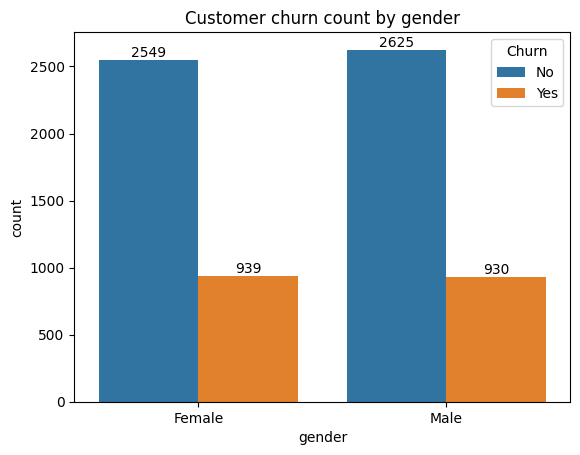

In [17]:
ax=sns.countplot(x='gender',data=df, hue='Churn')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Customer churn count by gender')
plt.show()

### ***Female Customers have more churn out as compared to Male customer***

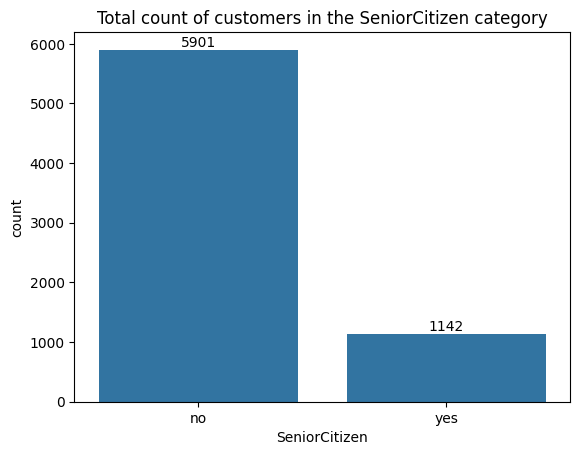

In [18]:
# @title Total count of customers in the SeniorCitizen category
ax=sns.countplot(x='SeniorCitizen',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Total count of customers in the SeniorCitizen category')
plt.show()

**1142 out of the total population(7043) of customers lie in the senior citizen category.**

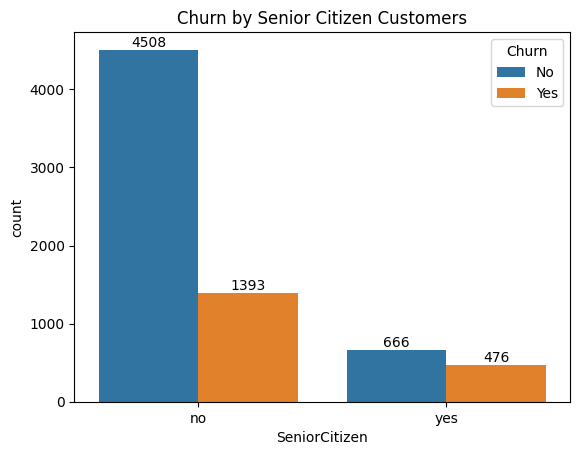

In [19]:
# @title The counts of SeniorCitizen customers who churned and those who didn't.

ax=sns.countplot(x='SeniorCitizen',data=df, hue='Churn')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Churn by Senior Citizen Customers')
plt.show()

**The senior citizen customer population has a 41.68 %  churn rate,
 i.e, 476 out of 1142**

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


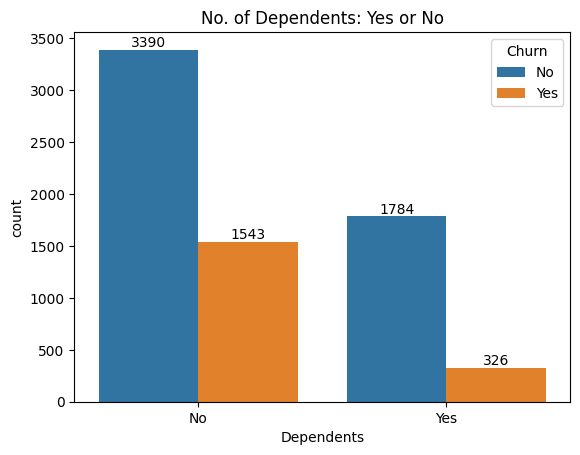

In [22]:
# @title Shows customer churn of how many customers have dependents vs. how many do not
ax=sns.countplot(x='Dependents',data=df, hue='Churn')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('No. of Dependents: Yes or No')
plt.show()

**The customer population having Dependents has a 15.45 % churn rate,
 i.e, 326 out of 2110**

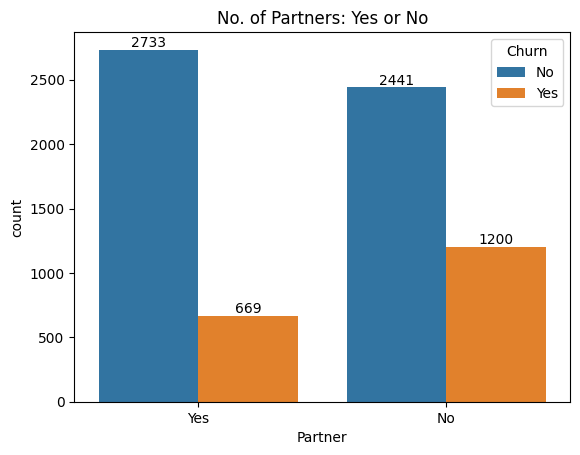

In [23]:
# @title Shows how many customers have partners vs. how many do not
ax=sns.countplot(x='Partner',data=df, hue='Churn')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('No. of Partners: Yes or No')
plt.show()

**The customer population having Partners has a 19.66 % churn rate,
 i.e, 669 out of 3402**

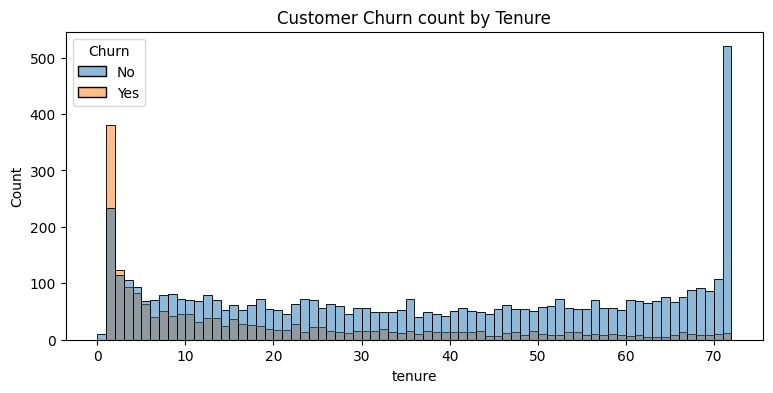

In [24]:
# @title  By Tenure
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df, bins=72, hue='Churn')
plt.title('Customer Churn count by Tenure')
plt.show()

#**Importance of focusing on customer retention strategies**
##**Key Findings:**

1. **Churn Rate Increases with Lower Tenure**:
*  In the *initial tenure bins* **(0-10 months**), taller orange bars (representing churned customers) are more prominent. This indicates a **higher churn rate among customers with shorter tenures**.

2. **Churn Rate Decreases with Increasing Tenure:**
*   *As the tenure increases*, the orange bars generally become shorter, therefore a **lower churn rate among customers** who have been with the company for a **longer duration.**

3. **Potential Churn Peak at Early Tenures:**

* **Also within the first few tenure bins** a noticeable peak in the orange bars can be observed so indicates a **critical period** where **customers are most likely to churn**.

4. **Long-Term Customers are Less Likely to Churn**

* The blue bars (representing non-churned customers) become more dominant **as the tenure increases**. So **customers** who stay with the company for an extended period are **less likely to churn.**


##**Recommendations:**
* To focus on customer retention strategies **during the initial tenure period**.

* To make targeted efforts to **improve customer onboarding**, **address potential pain points**, and **build strong customer relationships** can be crucial to reducing early churn.

* To inform strategies for **rewarding** and **incentivizing long-term customers** to further strengthen their loyalty.

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


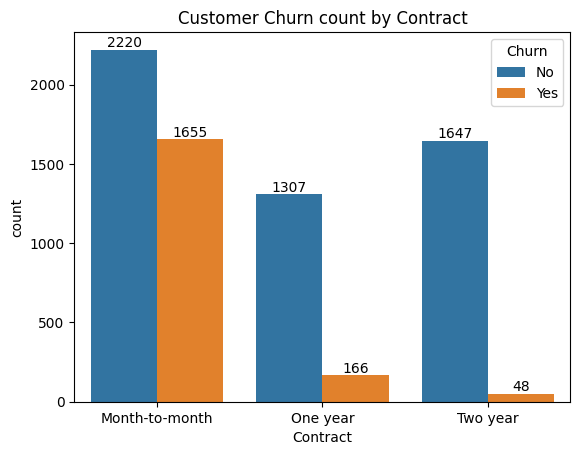

In [26]:
# @title By Contract
ax=sns.countplot(x='Contract',data=df, hue='Churn')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Customer Churn count by Contract')
plt.show()

### **From the above charts customers who have month to month contract are likely to churn from those who have 1 or 2 years contract**

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

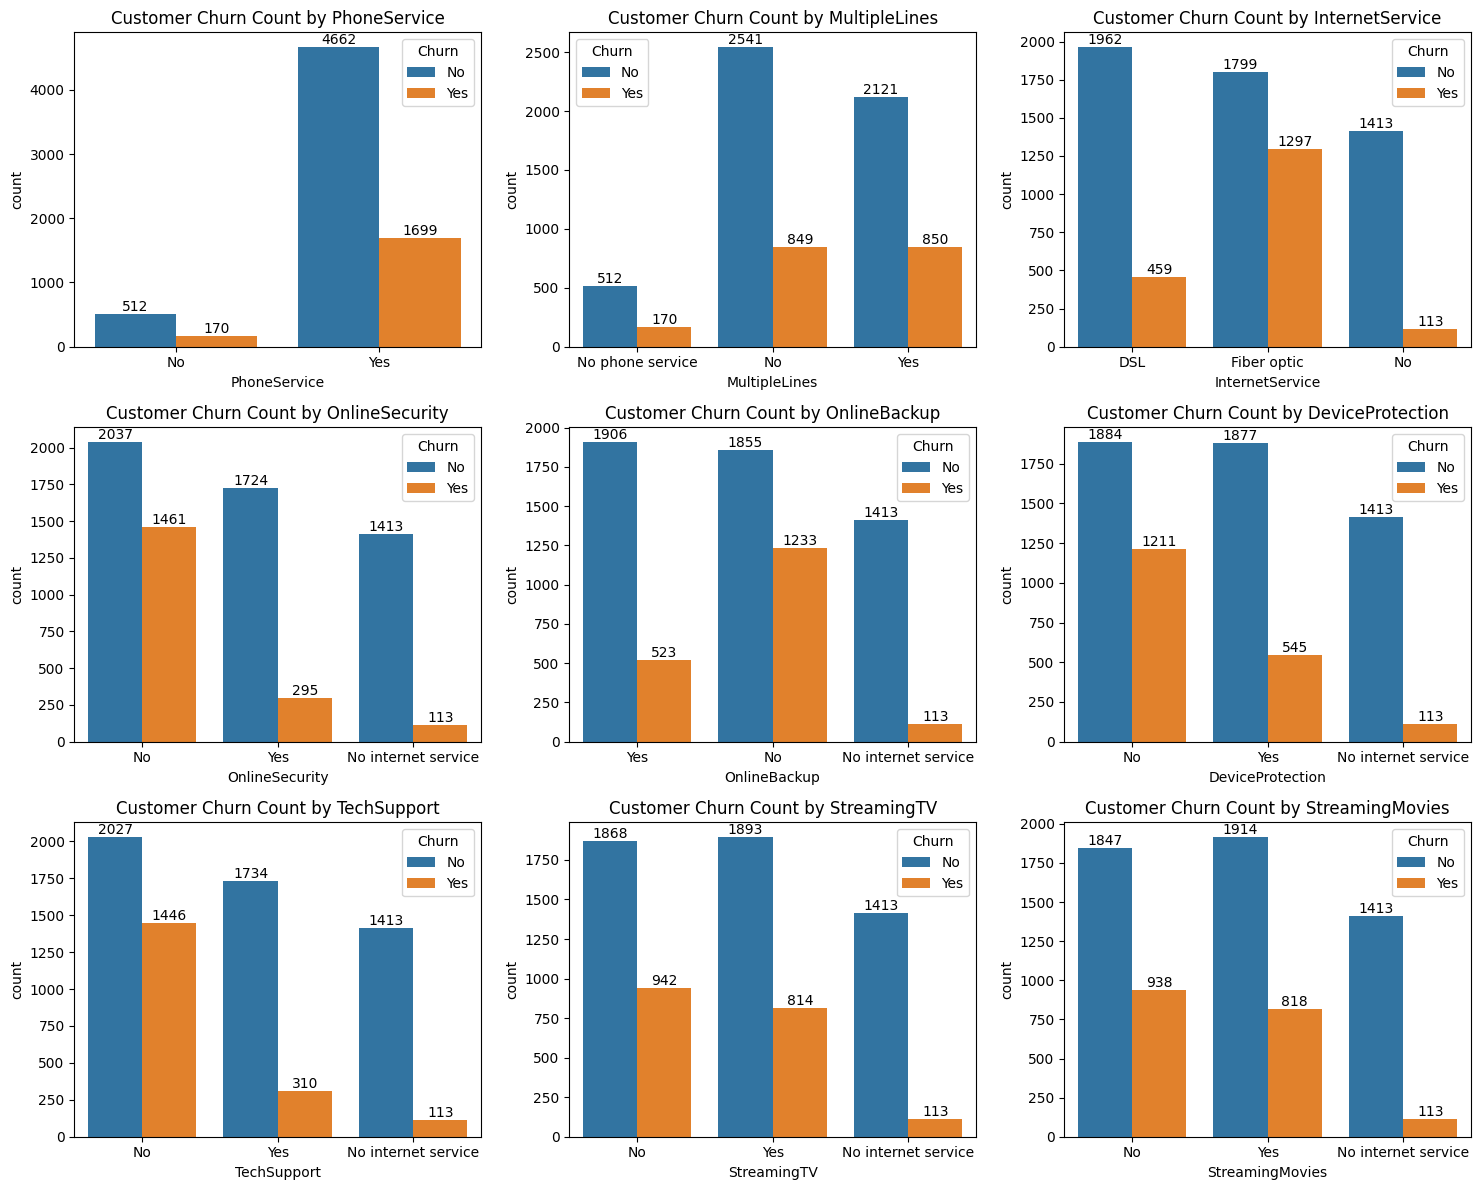

In [28]:
# @title Customer Churn out plots for the various specified columns in the dataset
# specified columns
columns=['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies']

# define number of rows and columns for subplots
n_cols = 3  # number of columns in the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # calculates rows needed

# set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))

# flatten the axes for easy iterartion
axes=axes.flatten()

# loop over the columns and create a countplot for each (*important)
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, hue='Churn', ax=axes[i])  # can try removing hue='churn'
    axes[i].set_title(f'Customer Churn Count by {col}')  # or just the column axes[i].set_title(col)
    # Add labels to the bars in the current countplot
    for bars in axes[i].containers:
        axes[i].bar_label(bars)
    # axes[i].set_xlabel('')

# Remove any empty subplots if the number of columns is not a multiple of n_cols
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


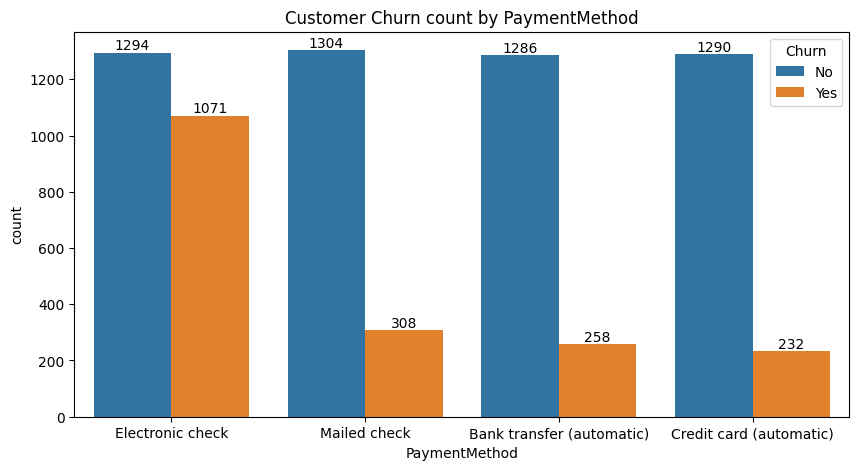

In [30]:
# @title For PaymentMethod
plt.figure(figsize=(10,5))
ax=sns.countplot(x='PaymentMethod',data=df, hue='Churn')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Customer Churn count by PaymentMethod')
plt.show()

**From the above bar graph, we can conclude that the majority customer population when they use the electronic check payment method has churn of 45.28 % ,i.e, 1071 out of 2365.**


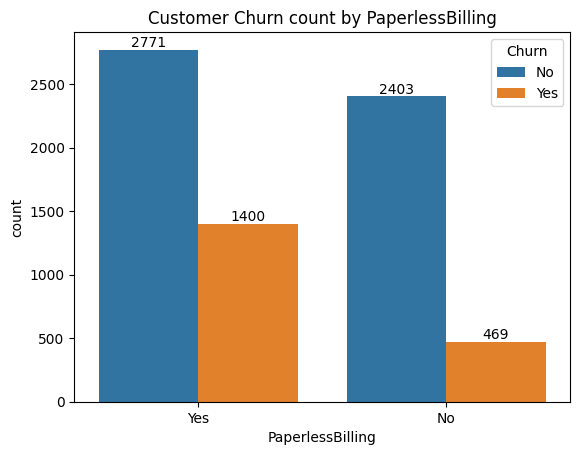

In [31]:
# @title By PaperlessBilling
ax=sns.countplot(x='PaperlessBilling',data=df, hue='Churn')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Customer Churn count by PaperlessBilling')
plt.show()

**Customers with paperless billing have a higher churn rate compared to those with paper billing.**

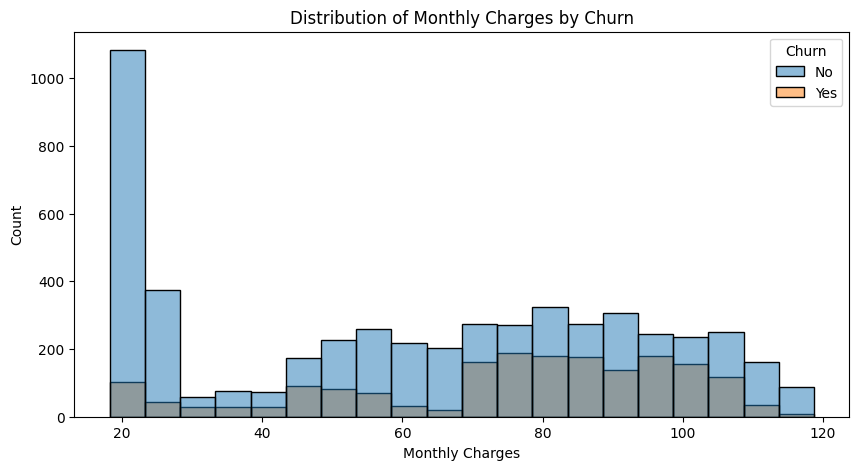

In [32]:
# @title By MonthlyCharges
# Histogram for MonthlyCharges
plt.figure(figsize=(10, 5))
sns.histplot(x='MonthlyCharges', data=df, hue='Churn', bins=20)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

**A larger proportion of customers have lower monthly charges, while a smaller proportion have higher charges.**

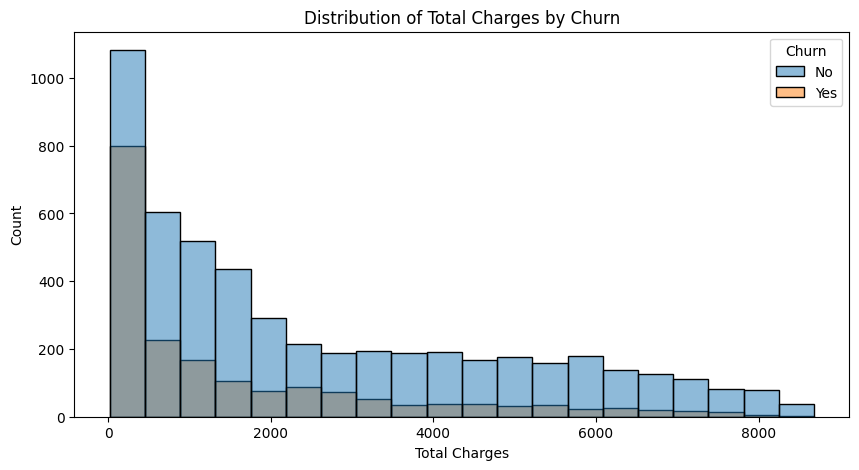

In [33]:
# @title By TotalCharges
# Histogram for TotalCharges
plt.figure(figsize=(10, 5))
sns.histplot(x='TotalCharges', data=df, hue='Churn', bins=20)
plt.title('Distribution of Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

**A larger proportion of customers have lower total charges, while a smaller proportion have higher charges.**